In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_manipulated.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(209806, 12)


In [7]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(204317, 12)


dataset size:  (204317, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  29.05  +/-  8.26
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.9  +/-  88.4  pixels
Mean Y location:  468.9  +/-  65.1  pixels
Mean saccade  amplitude:  104.7  +/-  16.9  pixels
Mean scanpath  length:  2547.8  +/-  495.9  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  29.05  +/-  8.26
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.9  +/-  88.4  pixels
Mean Y location:  468.9  +/-  65.1  pixels
Mean saccade  amplitude:  104.7  +/-  16.9  pixels
Mean scanpath  length:  2547.8  +/-  495.9  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

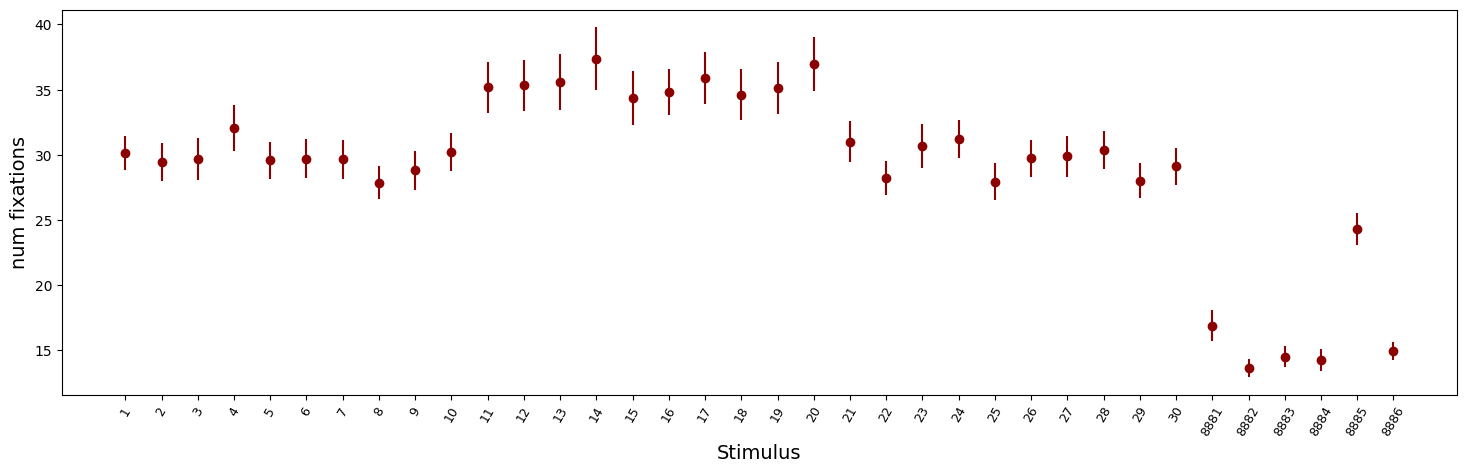

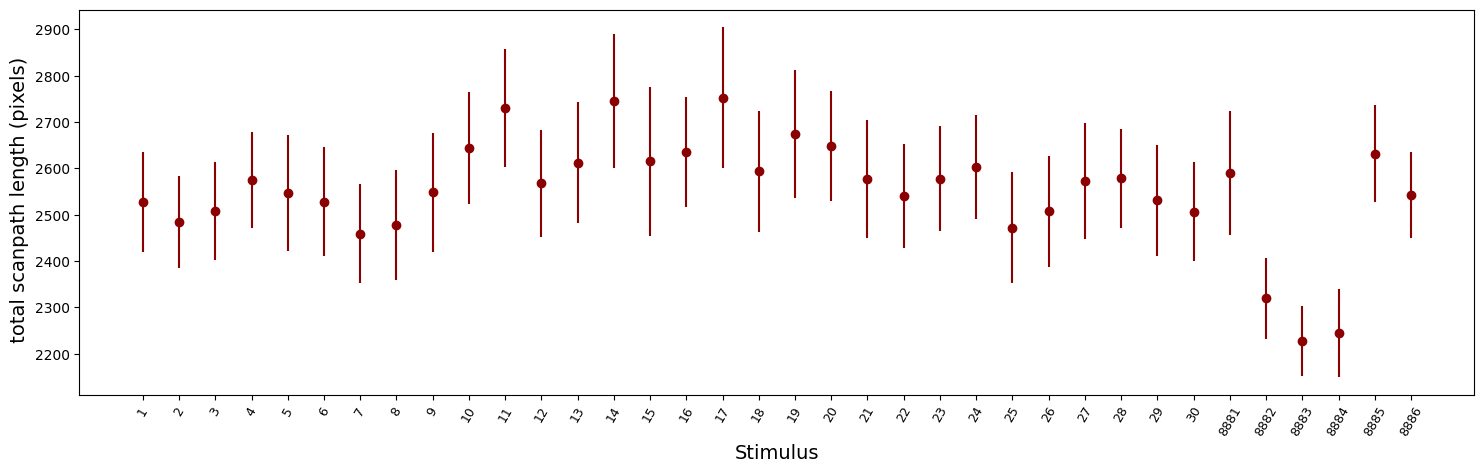

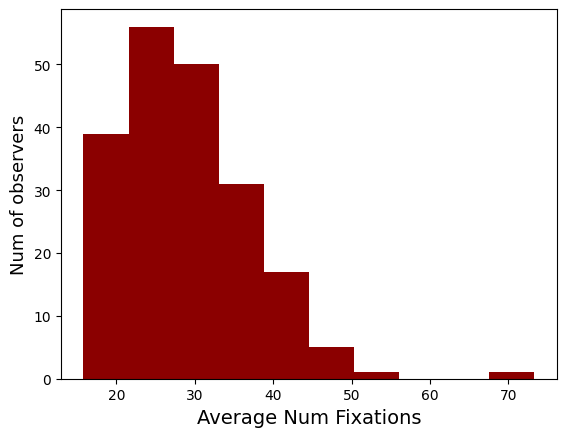

In [8]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [9]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [10]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [11]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [12]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [13]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1920  y = 1080
0 1 4.42 maximum entropy 6.68
resolution x = 1920  y = 1080
1 2 4.41 maximum entropy 6.68
resolution x = 1920  y = 1080
2 3 4.39 maximum entropy 6.68
resolution x = 1920  y = 1080
3 4 4.51 maximum entropy 6.68
resolution x = 1920  y = 1080
4 5 4.52 maximum entropy 6.68
resolution x = 1920  y = 1080
5 6 4.4 maximum entropy 6.68
resolution x = 1920  y = 1080
6 7 4.43 maximum entropy 6.68
resolution x = 1920  y = 1080
7 8 4.42 maximum entropy 6.68
resolution x = 1920  y = 1080
8 9 4.49 maximum entropy 6.68
resolution x = 1920  y = 1080
9 10 4.39 maximum entropy 6.68
resolution x = 1920  y = 1080
10 11 4.39 maximum entropy 6.68
resolution x = 1920  y = 1080
11 12 4.39 maximum entropy 6.68
resolution x = 1920  y = 1080
12 13 4.4 maximum entropy 6.68
resolution x = 1920  y = 1080
13 14 4.43 maximum entropy 6.68
resolution x = 1920  y = 1080
14 15 4.38 maximum entropy 6.68
resolution x = 1920  y = 1080
15 16 

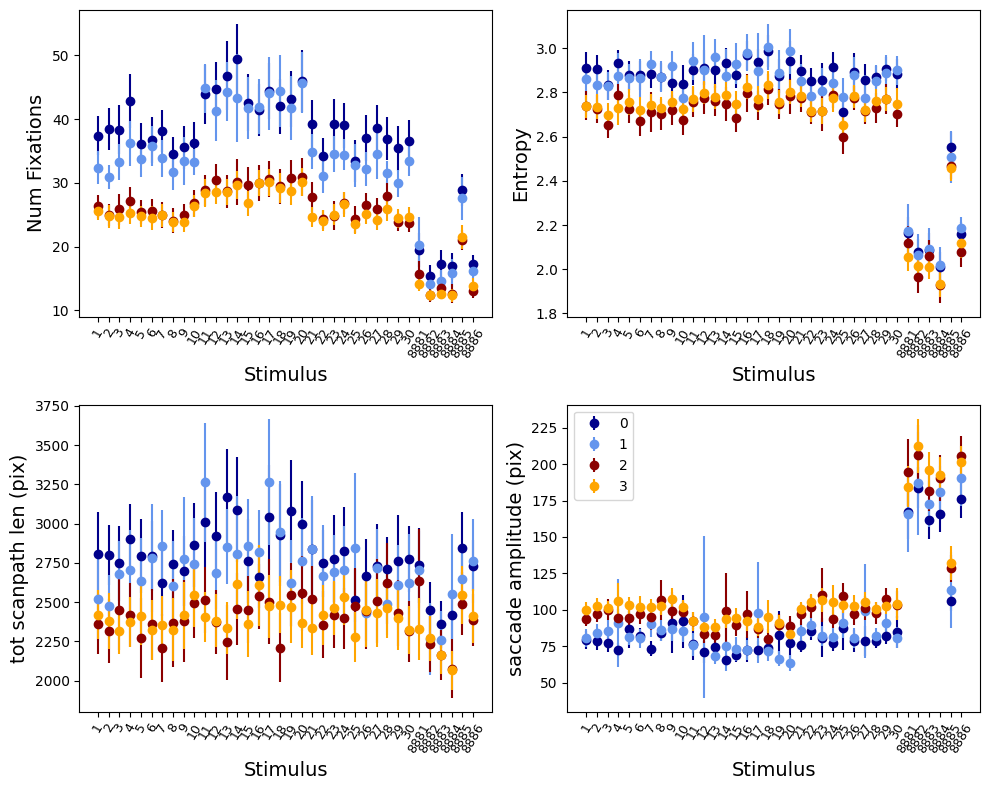

In [14]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [15]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [16]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [17]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [18]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  24.93 +/- 5.49
0 0 max num fix=  48.91
0 0 min num fix=  15.8
0 0 Entropy=  2.64 +/- 0.17
0 0 tot scanpath len =  2408.09 +/- 477.02 pix
0 0 saccade amplitude =  111.85 +/- 15.28 pix

1 1 num participants:  81
1 1 Num fix=  35.1 +/- 7.93
1 1 max num fix=  73.31
1 1 min num fix=  18.77
1 1 Entropy=  2.76 +/- 0.17
1 1 tot scanpath len =  2753.01 +/- 449.5 pix
1 1 saccade amplitude =  94.11 +/- 13.29 pix



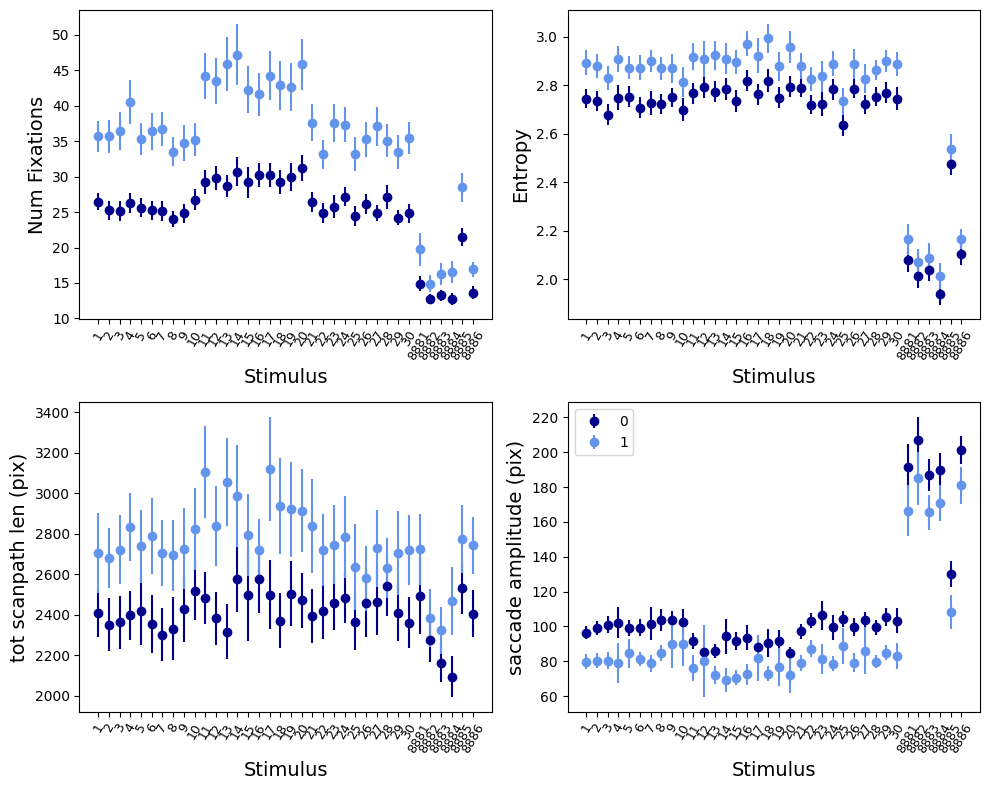

In [19]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [20]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[16. 37. 44. 45. 47. 57. 45. 45. 44. 49. 42. 60. 40. 42. 62. 37. 44. 32.
 44. 53. nan 47. 60. 45. 37. 37. 58. 88. 44. 42. 32. 40. 27. 44. 69. 78.
 42. 53. 53. 87. 71. 46. 40. 34. nan 34. 75. 61. 58. 72. 54. 39. 43. 50.
 44. 51. 52. 87. 28. 48. 31. 38. 57. 36. 49. 30.  7. nan 51. nan 19. 41.
 33. 61. 28. 40. 37. 34. 21. 32. 28.]
max num fix=  88.0
min num fix=  7.0
average num fix=  45.81818181818182


In [21]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[33. 37. 25. 40. 32. 53. 20. 22. 42. 36. 27. 49. 49. 35. 46. 25. 62. 21.
 30. 40. 68. 30. 33. 26. 40. 44. 21. 43. 40. 32. 30. 31. 44. 33. 25. 26.
 32. 35. 27. 48. 31. 39. 35. 36. 48. 35. 60. 50. 32. 35. 48. 32. 31. 38.
 24. 28. 31. 33. 28. 14. 23. 25. 26. 19. 22. 17. nan 27. 34. 25. 24. 32.
 23. 19. 22. 28. 30. 36. 24. 25. 24. 27. 30. 32. 21. 24. 23. 31. 23. 22.
 49. 30. 20. 22. 19. 28. 30. 37. 31. 20. 19. nan 18. 23. 19. 23. 24. 32.
 34. 30. 26. 19. 26. 43. 27. 21. 41. 25. 33.]
max num fix=  68.0
min num fix=  14.0
average num fix=  31.17094017094017


In [22]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [23]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [24]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.212347095765564
---------------------------------------------------------
Group 1
Angle Entropy: 7.500689705575385
---------------------------------------------------------
 
t-test between groups 0 and 1
t: 0.21566884316625107, p: 0.8292462196314851
 


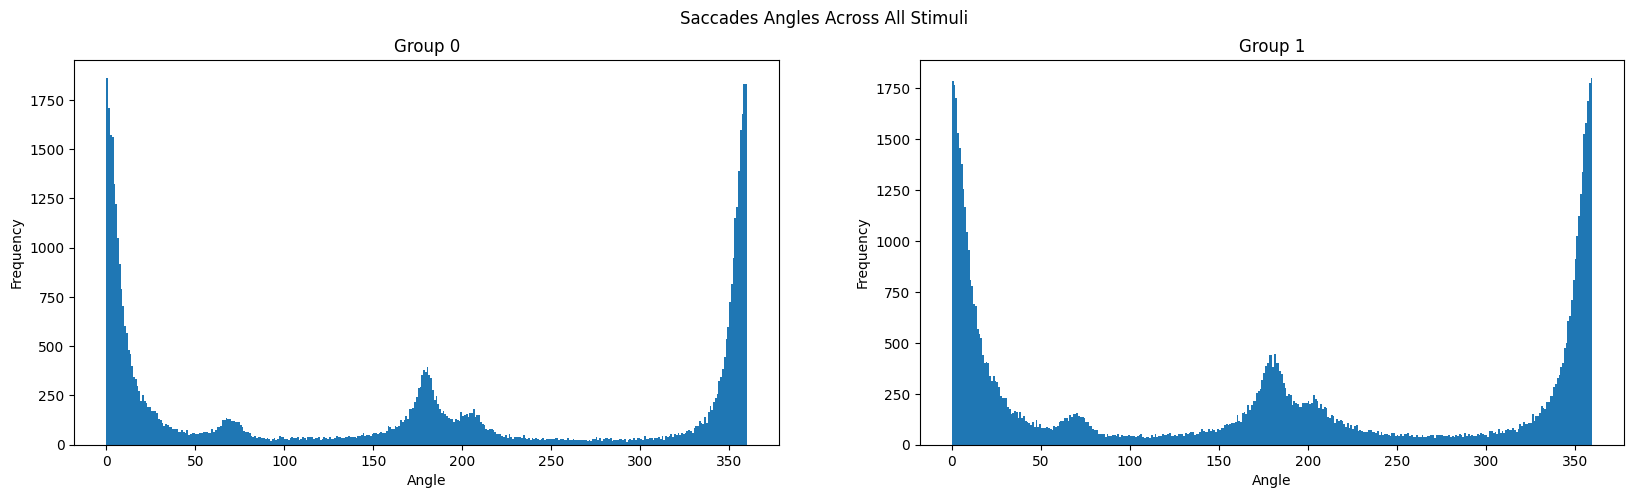

In [25]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [26]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

Now we proceed to test the same model but over multiple stimuli

In [27]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 32,
 41,
 43,
 44,
 53,
 55,
 58,
 64,
 66,
 73,
 76,
 80,
 82,
 83,
 91,
 94,
 96,
 99,
 115,
 116]

In [20]:
#stimuli = [3, 13, 25, 34]
stimuli = [3, 13]

In [168]:
def vectorize(SimAndFeatureVals , vec):
    _, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(SimsVals), 4))
    for subj in range(len(SimsVals)):
        vector_roi[subj][0] = SimsVals[subj][0][0][0]
        vector_roi[subj][1] = SimsVals[subj][0][0][1]
        vector_roi[subj][2] = SimsVals[subj][0][0][2]
        vector_roi[subj][3] = SimsVals[subj][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    test_subj = [subj[i] for i in test_index]
    train_subj = [subj[i] for i in train_index]

    remove_subj = np.append(test_index, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=list(remove_subj)) # 81.47% +- 11.22
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)
    
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)

    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=10)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6723659038543701
Epoch 5 loss: 0.5143190622329712
Epoch 10 loss: 0.5008633136749268
Epoch 15 loss: 0.494373619556427
Epoch 0 loss: 0.6599166393280029
Epoch 5 loss: 0.5108235478401184
Epoch 10 loss: 0.49130988121032715
Epoch 15 loss: 0.48304182291030884
Epoch 0 loss: 0.661562442779541
Epoch 5 loss: 0.5036697387695312
Epoch 10 loss: 0.4697260856628418
Epoch 15 loss: 0.45373252034187317
Epoch 0 loss: 0.7307984232902527
Epoch 5 loss: 0.6570238471031189
Epoch 10 loss: 0.572294294834137
Epoch 15 loss: 0.525486946105957
Epoch 0 loss: 0.725956380367279
Epoch 5 loss: 0.5986025929450989
Epoch 10 loss: 0.5328891277313232
Epoch 15 loss: 0.5114946961402893
Average accuracy: 0.8147368421052631
Standard deviation: 0.11222504102826165
Total confusion matrix:
[[43.  9.]
 [ 9. 36.]]
False positives: 9.0
False negatives: 9.0


We can notice an important improvment in the perfromance

Now we extract more features and we test this global feature in coparison with the similarity features and with the combined features (similarity + global features)

In [28]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [29]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

Firstly we can notice that only the global features are giving good performance, but lower compared to the similarity features.

----

In [30]:
stimuli = list(range(0, 30))

In [31]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\nickp\AppData\Local\Temp\ipykernel_10816\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide


Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [32]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [33]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [34]:
Saccade.shape

(200, 36, 1, 1)

In [35]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=10)

In [36]:
SimMatrix.shape

(200, 200, 36, 1, 1)

In [37]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [38]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [39]:
Features.shape

(200, 30, 1, 1)

In [40]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(5):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=10, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=10, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [41]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

5
30
79
9


In [42]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.8232539399582807

---

In [43]:
def calculate_hedges_g(group1, group2):
    """
    Calculate Hedges' g effect size between two groups
    
    Parameters:
    group1, group2: arrays of observations
    
    Returns:
    hedges_g: effect size (group1_mean - group2_mean) / pooled_sd
    ci_lower, ci_upper: 95% confidence interval
    """
    n1, n2 = len(group1), len(group2)
    m1, m2 = np.mean(group1), np.mean(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

    # Pooled standard deviation
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    
    # Cohen's d
    cohens_d = (m1 - m2) / pooled_sd
    
    # Correction factor for Hedges' g
    correction_factor = 1 - (3 / (4*(n1+n2-2) - 1))
    hedges_g = cohens_d * correction_factor
    
    # Standard error for Hedges' g
    se = np.sqrt((n1+n2)/(n1*n2) + hedges_g**2/(2*(n1+n2-2)))
    
    # 95% confidence interval
    ci_lower = hedges_g - 1.96 * se
    ci_upper = hedges_g + 1.96 * se
    
    return hedges_g, ci_lower, ci_upper

def create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes"):
    """
    Create a forest plot for effect sizes
    
    Parameters:
    effect_sizes_data: dict with keys as feature names and values as (hedges_g, ci_lower, ci_upper)
    """
    
    # Prepare data for plotting
    features = list(effect_sizes_data.keys())
    hedges_g = [effect_sizes_data[feat][0] for feat in features]
    ci_lower = [effect_sizes_data[feat][1] for feat in features]
    ci_upper = [effect_sizes_data[feat][2] for feat in features]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create y-axis positions
    y_pos = np.arange(len(features))
    
    # Plot confidence intervals as horizontal lines
    for i, (lower, upper) in enumerate(zip(ci_lower, ci_upper)):
        ax.plot([lower, upper], [i, i], 'k-', linewidth=1.5)
    
    # Plot effect sizes as red dots
    ax.scatter(hedges_g, y_pos, color='red', s=60, zorder=5)
    
    # Add vertical reference lines
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize the plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.set_xlabel("Hedges' g (with 95% CI)", fontsize=12)
    ax.set_ylabel("Eye Movement Metric", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add labels for interpretation
    ax.text(ax.get_xlim()[0], -0.8, "Dyslexia > Control", ha='left', fontsize=10)
    ax.text(ax.get_xlim()[1], -0.8, "Dyslexia < Control", ha='right', fontsize=10)
    
    # Add arrow
    arrow_y = -0.6
    ax.annotate('', xy=(ax.get_xlim()[1]-0.1, arrow_y), xytext=(ax.get_xlim()[0]+0.1, arrow_y),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1))
    
    plt.tight_layout()
    return fig, ax

def analyze_eyetracking_data(GlobalFeature_array, dyslexia_labels):
    """
    Analyze eye-tracking data and calculate effect sizes
    
    Parameters:
    GlobalFeature_array: list with dict with feature names as keys, shape (n_stimuli, n_subjects)
    dyslexia_labels: array of labels (0 for control, 1 for dyslexia) of length n_subjects
    
    Returns:
    effect_sizes_data: dict with effect sizes and confidence intervals
    """
    
    # Map your features to more readable names (optional)
    feature_names_mapping = {
        'number_fixation': 'Number Fixations',
        'fixation_entropy': 'Fixation Entropy',
        'mean_fixation_duration': 'Fixation Duration (Mean)',
        'std_fixation_duration': 'Fixation Duration (Std)',
        'total_reading_duration': 'Total Reading Duration',
        'mean_saccade_amplitude': 'Saccade Amplitude (Mean)',
        'std_saccade_amplitude': 'Saccade Amplitude (Std)',
        'regression': 'Number Regressions',
        'progression/regression': 'Progression/Regression Ratio',
    }
    
    effect_sizes_data = {}

    feature_keys = None
    for stim in range(GlobalFeature_array.shape[0]):
        for subj in range(GlobalFeature_array.shape[1]):
            if GlobalFeature_array[stim, subj] is not None:
                feature_keys = list(GlobalFeature_array[stim, subj].keys())
                break
        if feature_keys is not None:
            break

    for feature_key in feature_keys:
        # Extract feature values for all subjects and stimuli
        feature_matrix = np.zeros((GlobalFeature_array.shape[0], GlobalFeature_array.shape[1]))
        feature_matrix[:] = np.nan  # Initialize with NaN
        
        for stim in range(GlobalFeature_array.shape[0]):
            for subj in range(GlobalFeature_array.shape[1]):
                if GlobalFeature_array[stim, subj] is not None and feature_key in GlobalFeature_array[stim, subj]:
                    feature_matrix[stim, subj] = GlobalFeature_array[stim, subj][feature_key]
        
        # Average across stimuli for each subject (ignoring NaN values)
        subject_averages = np.nanmean(feature_matrix, axis=0)
        
        # Remove subjects with all NaN values
        valid_subjects = ~np.isnan(subject_averages)
        subject_averages = subject_averages[valid_subjects]
        valid_labels = dyslexia_labels[valid_subjects]
        
        # Separate by group
        control_group = subject_averages[valid_labels == 0]
        dyslexia_group = subject_averages[valid_labels == 1]
        
        # Calculate effect size (dyslexia - control)
        hedges_g, ci_lower, ci_upper = calculate_hedges_g(control_group, dyslexia_group)

        # Use mapped name if available
        display_name = feature_names_mapping.get(feature_key, feature_key)
        effect_sizes_data[display_name] = (hedges_g, ci_lower, ci_upper)
    
    return effect_sizes_data

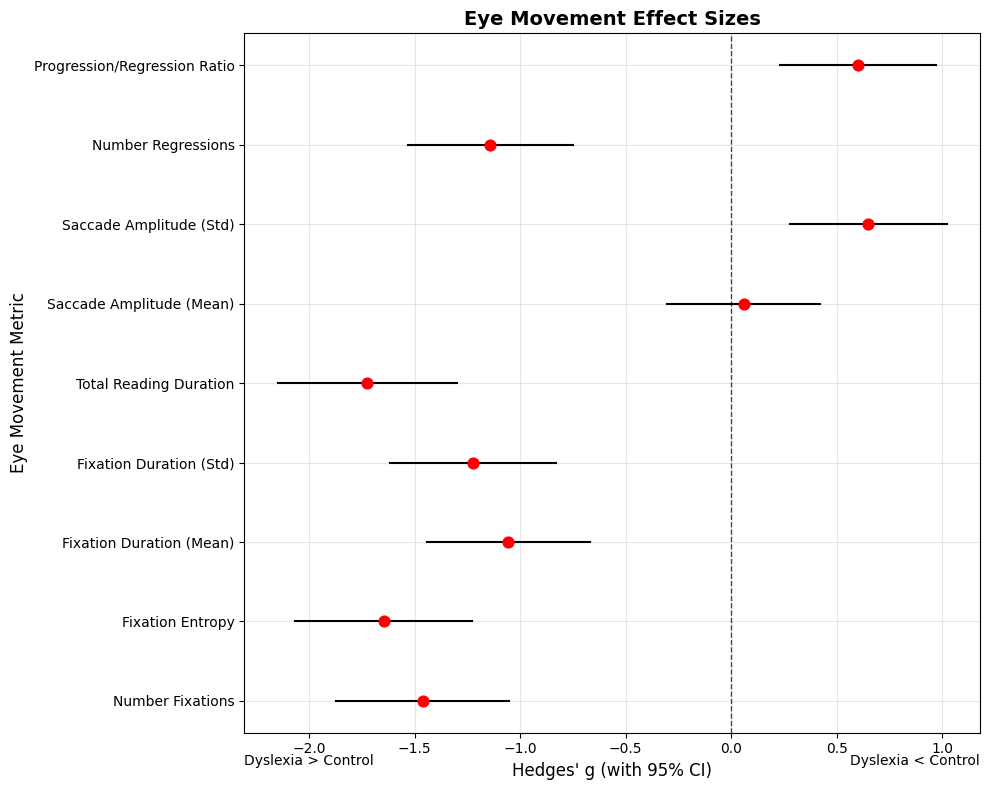

In [44]:
np.random.seed(42)

subj = list(range(0, 117))

labels = np.array([WhichCN[sub] for sub in subj])

# take global feature for all stimuli and all subjects in subj
global_f = np.zeros((len(stimuli), len(subj)), dtype=object)
for stim in range(len(stimuli)):
    for s_idx,s in enumerate(subj):
        global_f[stim, s_idx] = GlobalFeature_array[stim][s]

effect_sizes_data = analyze_eyetracking_data(global_f, labels)
fig, ax = create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes")
plt.show()

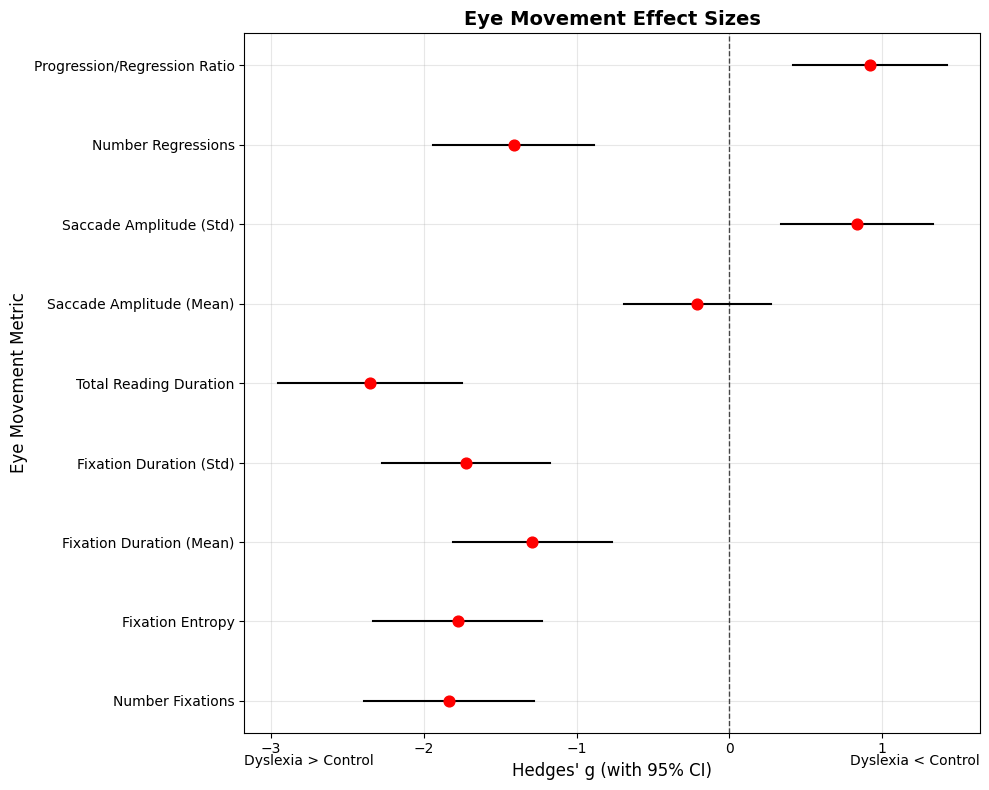

In [45]:
np.random.seed(42)

subj = list(range(117, 200))

labels = np.array([WhichCN[sub] for sub in subj])

# take global feature for all stimuli and all subjects in subj
global_f = np.zeros((len(stimuli), len(subj)), dtype=object)
for stim in range(len(stimuli)):
    for s_idx,s in enumerate(subj):
        global_f[stim, s_idx] = GlobalFeature_array[stim][s]

effect_sizes_data = analyze_eyetracking_data(global_f, labels)
fig, ax = create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes")
plt.show()

---

In [49]:
def train_test_pipeline(stimuli):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(5):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.8)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [32]:
def vectorize(_, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [33]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7456600069999695
Epoch 5 loss: 0.45950761437416077
Epoch 10 loss: 0.4058627784252167
Epoch 15 loss: 0.3394806385040283
Epoch 0 loss: 0.7560873031616211
Epoch 5 loss: 0.43360427021980286
Epoch 10 loss: 0.3773747682571411
Epoch 15 loss: 0.3279688060283661
Epoch 0 loss: 0.6970651149749756
Epoch 5 loss: 0.41990071535110474
Epoch 10 loss: 0.3488245904445648
Epoch 15 loss: 0.34461739659309387
Epoch 0 loss: 0.7035020589828491
Epoch 5 loss: 0.44645658135414124
Epoch 10 loss: 0.36317843198776245
Epoch 15 loss: 0.33890023827552795
Epoch 0 loss: 0.7201836109161377
Epoch 5 loss: 0.45048466324806213
Epoch 10 loss: 0.379077672958374
Epoch 15 loss: 0.34862712025642395
Average accuracy: 0.888888888888889
Standard deviation: 0.07027283689263066
Total confusion matrix:
[[24.  1.]
 [ 4. 16.]]
False positives: 1.0
False negatives: 4.0


In [34]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, _ in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [35]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(60, 30) 
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.softmax(self.fc3(x)) 
        return x

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7542489171028137
Epoch 5 loss: 0.5250680446624756
Epoch 10 loss: 0.437835156917572
Epoch 15 loss: 0.362135112285614
Epoch 0 loss: 0.7334904074668884
Epoch 5 loss: 0.5078375339508057
Epoch 10 loss: 0.44426867365837097
Epoch 15 loss: 0.3766213357448578
Epoch 0 loss: 0.803540050983429
Epoch 5 loss: 0.5880001783370972
Epoch 10 loss: 0.4693588614463806
Epoch 15 loss: 0.38254407048225403
Epoch 0 loss: 0.8142757415771484
Epoch 5 loss: 0.5183989405632019
Epoch 10 loss: 0.4099031686782837
Epoch 15 loss: 0.3780179023742676
Epoch 0 loss: 0.7575462460517883
Epoch 5 loss: 0.5700200200080872
Epoch 10 loss: 0.5088671445846558
Epoch 15 loss: 0.42224806547164917
Average accuracy: 0.8
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[21.  4.]
 [ 5. 15.]]
False positives: 4.0
False negatives: 5.0


In [36]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [37]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7620289325714111
Epoch 5 loss: 0.40072348713874817
Epoch 10 loss: 0.33212587237358093
Epoch 15 loss: 0.3227345943450928
Epoch 0 loss: 0.7364525198936462
Epoch 5 loss: 0.4302339255809784
Epoch 10 loss: 0.35144534707069397
Epoch 15 loss: 0.33229824900627136
Epoch 0 loss: 0.6975954174995422
Epoch 5 loss: 0.3980957567691803
Epoch 10 loss: 0.32456329464912415
Epoch 15 loss: 0.3174794614315033
Epoch 0 loss: 0.7016164064407349
Epoch 5 loss: 0.4069512188434601
Epoch 10 loss: 0.33019086718559265
Epoch 15 loss: 0.3196698725223541
Epoch 0 loss: 0.6924247741699219
Epoch 5 loss: 0.39382439851760864
Epoch 10 loss: 0.3245008587837219
Epoch 15 loss: 0.3166787922382355
Average accuracy: 0.9333333333333332
Standard deviation: 0.13333333333333336
Total confusion matrix:
[[23.  2.]
 [ 1. 19.]]
False positives: 2.0
False negatives: 1.0


In [39]:
results[0]['accuracy']  # Access accuracy of the first fold

1.0

c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Input tensor shape: torch.Size([9, 300])
Target class: tensor([1, 0, 0, 1, 1, 1, 0, 0, 0], device='cuda:0')
Input tensor shape: torch.Size([9, 300])
Target class: tensor([1, 0, 0, 0, 0, 1, 1, 1, 0], device='cuda:0')
Input tensor shape: torch.Size([9, 300])
Target class: tensor([0, 1, 0, 0, 0, 1, 0, 1, 1], device='cuda:0')
Input tensor shape: torch.Size([9, 300])
Target class: tensor([1, 1, 1, 0, 0, 1, 0, 0, 0], device='cuda:0')
Input tensor shape: torch.Size([9, 300])
Target class: tensor([1, 1, 0, 1, 1, 0, 0, 0, 0], device='cuda:0')
Attributions: [0.00133056 0.00225604 0.00130196 0.00163046 0.00191526 0.00111831
 0.00049015 0.00138517 0.00082549 0.00184517]
Approximation Error: 0.0008207645732909441 (< 0.05 is good)


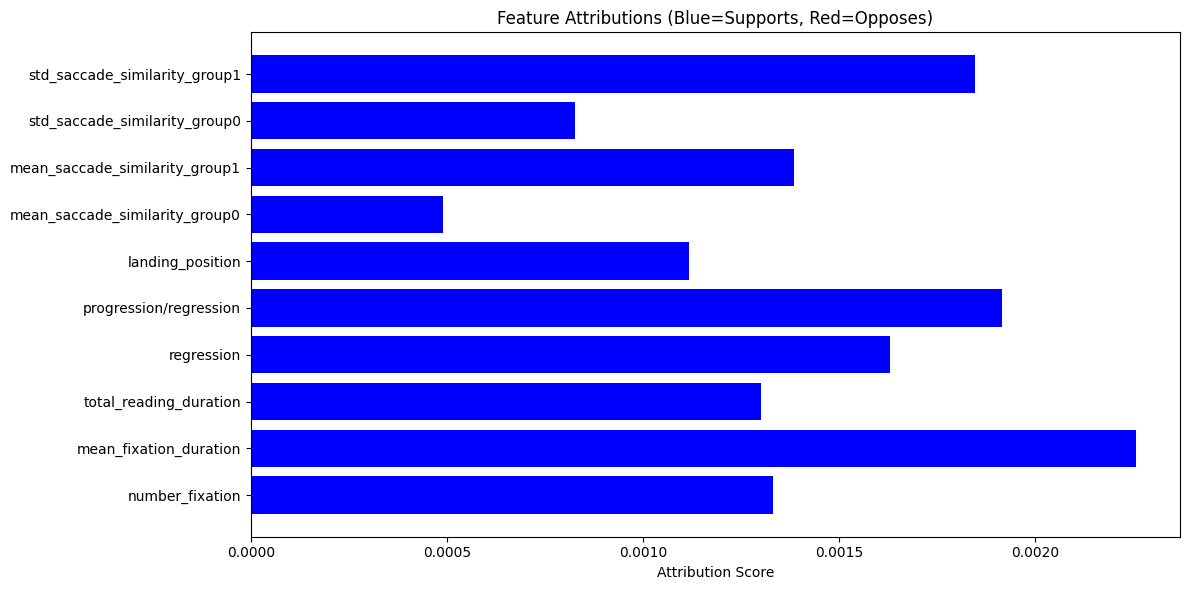

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attributions(attributions, feature_names):
    plt.figure(figsize=(12, 6))
    colors = ['red' if x < 0 else 'blue' for x in attributions]
    plt.barh(feature_names, attributions, color=colors)
    plt.xlabel("Attribution Score")
    plt.title("Feature Attributions (Blue=Supports, Red=Opposes)")
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    plt.tight_layout()
    plt.show()

# Usage
num_stimuli = 30

attributions = []
errors = []
for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    print(f"Input tensor shape: {input_tensor.shape}")
    print(f"Target class: {target_class}")

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)

attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape and average across stimuli
attributions = attributions.reshape(len(feature_names), num_stimuli).mean(axis=1)

print("Attributions:", attributions)
print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

visualize_attributions(attributions, feature_names)

In [46]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Approximation Error: 0.0004573722544591874 (< 0.05 is good)

FEATURE ANALYSIS


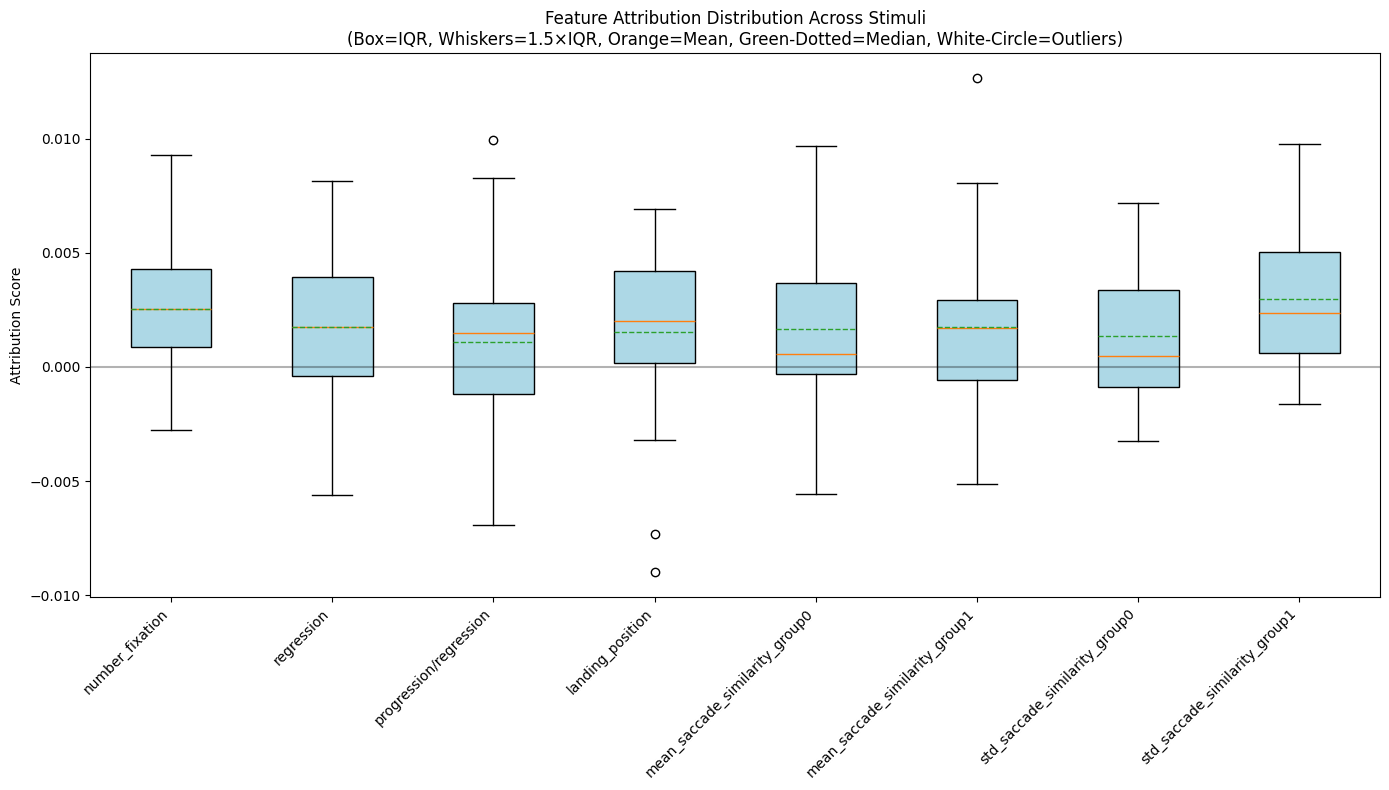


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0025, Std= 0.0026, Min=-0.0028, Max= 0.0093
regression                    : Mean= 0.0018, Std= 0.0031, Min=-0.0056, Max= 0.0081
progression/regression        : Mean= 0.0011, Std= 0.0035, Min=-0.0069, Max= 0.0100
landing_position              : Mean= 0.0015, Std= 0.0036, Min=-0.0090, Max= 0.0069
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0034, Min=-0.0056, Max= 0.0097
mean_saccade_similarity_group1: Mean= 0.0018, Std= 0.0037, Min=-0.0051, Max= 0.0127
std_saccade_similarity_group0 : Mean= 0.0013, Std= 0.0030, Min=-0.0032, Max= 0.0072
std_saccade_similarity_group1 : Mean= 0.0030, Std= 0.0032, Min=-0.0016, Max= 0.0098


In [59]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [57]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [58]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7493928074836731
Epoch 5 loss: 0.402620404958725
Epoch 10 loss: 0.32788363099098206
Epoch 15 loss: 0.31443509459495544
Epoch 0 loss: 0.7226772308349609
Epoch 5 loss: 0.42950907349586487
Epoch 10 loss: 0.33116087317466736
Epoch 15 loss: 0.3260657787322998
Epoch 0 loss: 0.7071588635444641
Epoch 5 loss: 0.3944348096847534
Epoch 10 loss: 0.33253905177116394
Epoch 15 loss: 0.32719478011131287
Epoch 0 loss: 0.6788769960403442
Epoch 5 loss: 0.4288133680820465
Epoch 10 loss: 0.3288287818431854
Epoch 15 loss: 0.31803372502326965
Epoch 0 loss: 0.7027785778045654
Epoch 5 loss: 0.4042578935623169
Epoch 10 loss: 0.3456467390060425
Epoch 15 loss: 0.32665693759918213
Average accuracy: 0.9555555555555555
Standard deviation: 0.08888888888888888
Total confusion matrix:
[[25.  0.]
 [ 2. 18.]]
False positives: 0.0
False negatives: 2.0


In [51]:
feature_names = [
    "number_fixation",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]

Approximation Error: 0.0004573722544591874 (< 0.05 is good)

FEATURE ANALYSIS


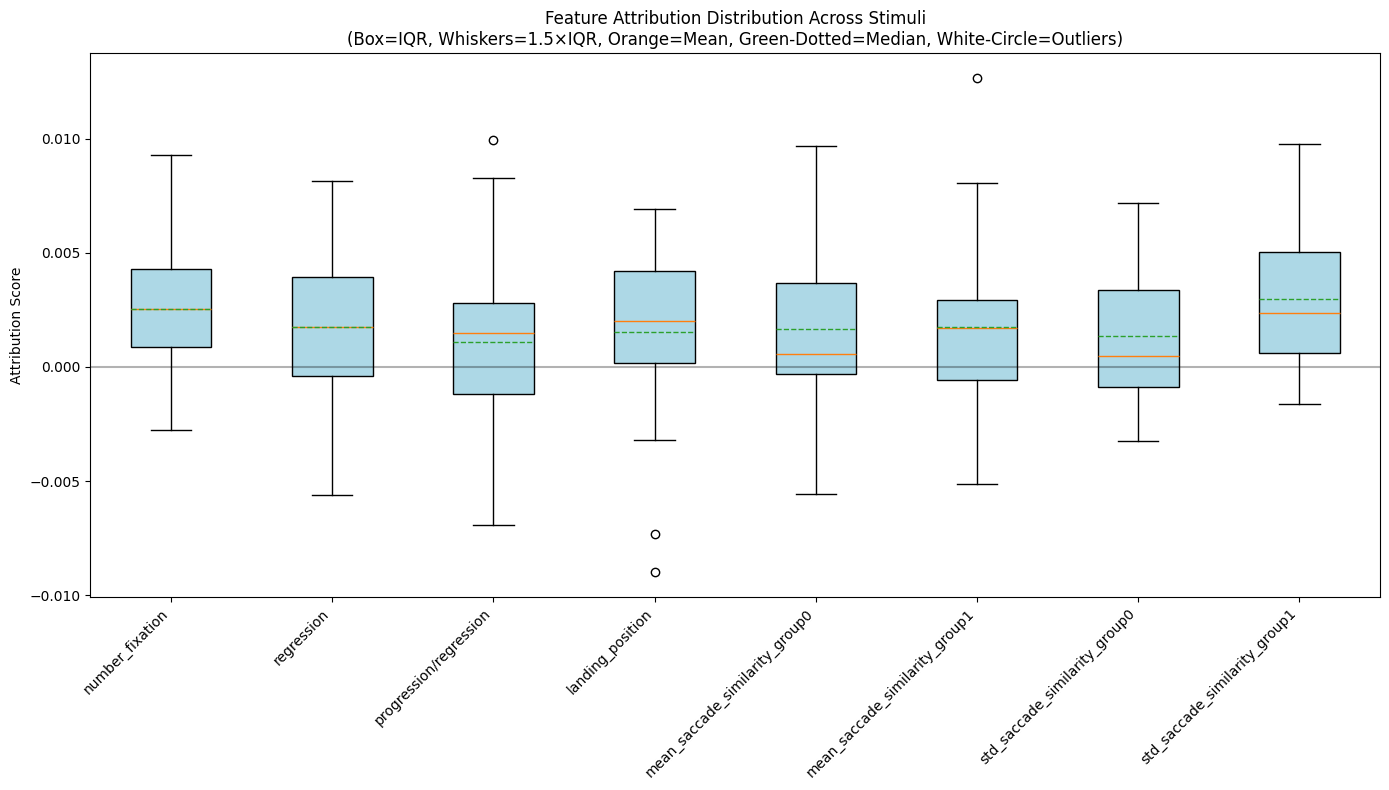


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0025, Std= 0.0026, Min=-0.0028, Max= 0.0093
regression                    : Mean= 0.0018, Std= 0.0031, Min=-0.0056, Max= 0.0081
progression/regression        : Mean= 0.0011, Std= 0.0035, Min=-0.0069, Max= 0.0100
landing_position              : Mean= 0.0015, Std= 0.0036, Min=-0.0090, Max= 0.0069
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0034, Min=-0.0056, Max= 0.0097
mean_saccade_similarity_group1: Mean= 0.0018, Std= 0.0037, Min=-0.0051, Max= 0.0127
std_saccade_similarity_group0 : Mean= 0.0013, Std= 0.0030, Min=-0.0032, Max= 0.0072
std_saccade_similarity_group1 : Mean= 0.0030, Std= 0.0032, Min=-0.0016, Max= 0.0098


In [52]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [62]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [63]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7657853364944458
Epoch 5 loss: 0.4764508605003357
Epoch 10 loss: 0.3825911283493042
Epoch 15 loss: 0.3511849045753479
Epoch 0 loss: 0.7669434547424316
Epoch 5 loss: 0.4252837896347046
Epoch 10 loss: 0.3581832945346832
Epoch 15 loss: 0.3283933103084564
Epoch 0 loss: 0.7450462579727173
Epoch 5 loss: 0.41909852623939514
Epoch 10 loss: 0.323855459690094
Epoch 15 loss: 0.3173646330833435
Epoch 0 loss: 0.7100493311882019
Epoch 5 loss: 0.4275931417942047
Epoch 10 loss: 0.3436501622200012
Epoch 15 loss: 0.33453819155693054
Epoch 0 loss: 0.748420000076294
Epoch 5 loss: 0.448040634393692
Epoch 10 loss: 0.36307644844055176
Epoch 15 loss: 0.32182788848876953
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[24.  1.]
 [ 3. 17.]]
False positives: 1.0
False negatives: 3.0


#### Now we try to dont consider features that use time information

In [60]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [61]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.749982476234436
Epoch 5 loss: 0.5018291473388672
Epoch 10 loss: 0.40087857842445374
Epoch 15 loss: 0.3505934774875641
Epoch 0 loss: 0.7440873980522156
Epoch 5 loss: 0.47072866559028625
Epoch 10 loss: 0.3885860741138458
Epoch 15 loss: 0.35174912214279175
Epoch 0 loss: 0.7168908715248108
Epoch 5 loss: 0.46179816126823425
Epoch 10 loss: 0.40234190225601196
Epoch 15 loss: 0.37619051337242126
Epoch 0 loss: 0.6888149380683899
Epoch 5 loss: 0.4749331772327423
Epoch 10 loss: 0.3662565350532532
Epoch 15 loss: 0.35438451170921326
Epoch 0 loss: 0.7273638844490051
Epoch 5 loss: 0.45419615507125854
Epoch 10 loss: 0.3699064254760742
Epoch 15 loss: 0.33516818284988403
Average accuracy: 0.9555555555555555
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[24.  1.]
 [ 1. 19.]]
False positives: 1.0
False negatives: 1.0
